### Assignment 3 - Data Integration and Data reshaping

Student ID: 29470811

Student Name: Prashantkumar P Kulkarni

#### 1.  Importing Libraries

In [1]:
import numpy
import matplotlib 
%matplotlib inline
import pandas as pd
from shapely.geometry import shape,Point,Polygon
from mpl_toolkits.basemap import Basemap 
import xml.etree.ElementTree as ET
import shapefile
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

#### 2. Loading JSON file for real estate and converting it to Dataframe

In [2]:
with open('real_state.json') as json_data:
    d = json.load(json_data)
df1 =pd.DataFrame(d)

#### 3. Loading XML file for real estate and converting it to Dataframe

In [3]:
path_to_xml_file = "real_state.xml"

tree = ET.parse(path_to_xml_file)
root = tree.getroot()
children = root.getchildren()
diction = {}
for child in root:
    list1 = []
    for element in child:
        list1.append(element.text)
    diction[child.tag] = list1

In [4]:
df2 = pd.DataFrame(diction)

#### 4. Combining the two dataframes into a single dataframe

In [5]:
df3 = pd.concat([df1, df2], ignore_index=True)

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 10 columns):
addr_street      2002 non-null object
bathrooms        2002 non-null object
bedrooms         2002 non-null object
lat              2002 non-null object
lng              2002 non-null object
parking_space    2002 non-null object
price            2002 non-null object
property_id      2002 non-null object
property_type    2002 non-null object
year             2002 non-null object
dtypes: object(10)
memory usage: 157.0+ KB


In [7]:
df3.describe(include='O')

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
count,2002,2002,2002,2002,2002,2002.0,2002.0,2002,2002,2002.0
unique,1966,7,11,1997,1996,9.0,1568.0,1998,2,25.0
top,nan,1.0,3.0,nan,nan,2.0,10080000.0,nan,house,2014.0
freq,3,535,553,3,3,546.0,7.0,3,1999,146.0


There are Null values, duplicates in the dataframe, we will remove the duplicates and null values from the dataframe

#### 5. Removing duplicates, null values from the dataframe

In [8]:
df3 =df3.drop_duplicates()
df3 = df3.dropna()

df3 = df3.reset_index(drop=True)

In [9]:
df3 = df3[df3['property_id'] != 'nan']

Once we have cleaned the dataframe, it is necessary to reset the index, will reset index of the rows.

In [10]:
df3 = df3.reset_index(drop=True)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 10 columns):
addr_street      1997 non-null object
bathrooms        1997 non-null object
bedrooms         1997 non-null object
lat              1997 non-null object
lng              1997 non-null object
parking_space    1997 non-null object
price            1997 non-null object
property_id      1997 non-null object
property_type    1997 non-null object
year             1997 non-null object
dtypes: object(10)
memory usage: 156.1+ KB


The dataframe is clean and can be used for our further calculations

In [12]:
df5 = df3.copy()

#### 6. Reading files in various formats into dataframes

Hospitals data in excel format into a dataframe

In [13]:
df_hosp = pd.read_excel("hospitals.xlsx")

Shopping Center data in the form of JSON

In [14]:
with open('shopingcenters.json') as json_data:
    d = json.load(json_data)
df_shopping =pd.DataFrame(d)

Supermarkets in the form of html

In [15]:
df_html = pd.read_html("supermarkets.html")
df_super = df_html[0]
df_super = df_super.drop(columns='Unnamed: 0')

Train stops in csv format

In [16]:
df_stops = pd.read_csv("stops.txt")

#### 7. Distance calculation

In [17]:
from math import cos, sin,asin, atan2, sqrt
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12756000 * asin(sqrt(a))

A. Calculating nearest shopping center and its distance

In [18]:
shop_id = []
distance_value = []
n = 0
for index1,row1 in df3.iterrows():
    distances = 100000
    for index,row in df_shopping.iterrows():
        dist = distance(float(row1['lat']),float(row1['lng']),float(row['lat']),float(row['lng']))
        if (dist < distances):
            distances = round(dist,0)
            row_id = row['sc_id']
    shop_id.append(row_id)
    distance_value.append(distances)
df3['shopping_center_id'] = pd.DataFrame(shop_id)
df3['distance_to_sc'] = pd.DataFrame(distance_value)

B. Calculating nearest train station and its distance

In [19]:
key_df = []
value_df = []
shop_id = []
distance_value = []
n = 0
for index1,row1 in df3.iterrows():
    distances = 100000
    for index,row in df_stops.iterrows():
        dist = distance(float(row1['lat']),float(row1['lng']),float(row['stop_lat']),float(row['stop_lon']))
        if (dist < distances):
            distances = round(dist,0)
            row_id = row['stop_id']
    shop_id.append(row_id)
    distance_value.append(distances)
df3['train_station_id'] = pd.DataFrame(shop_id)
df3['distance_to_train_station'] = pd.DataFrame(distance_value)

C. Calculating nearest hospital and its distance

In [20]:
key_df = []
value_df = []
shop_id = []
distance_value = []
for index1,row1 in df3.iterrows():
    distances = 100000
    for index,row in df_hosp.iterrows():
        dist = distance(float(row1['lat']),float(row1['lng']),float(row['lat']),float(row['lng']))
        if (dist < distances):
            distances = round(dist,0)
            row_id = row['id']
    shop_id.append(row_id)
    distance_value.append(distances)
df3['hospital_id'] = pd.DataFrame(shop_id)
df3['distance_to_hospital'] = pd.DataFrame(distance_value)

D. Calculating nearest supermarket and its distance

In [21]:
key_df = []
value_df = []
shop_id = []
distance_value = []
n = 0
for index1,row1 in df3.iterrows():
    distances = 100000
    for index,row in df_super.iterrows():
        dist = distance(float(row1['lat']),float(row1['lng']),float(row['lat']),float(row['lng']))
        if (dist < distances):
            distances = round(dist,0)
            row_id = row['id']
    shop_id.append(row_id)
    distance_value.append(distances)
df3['supermarket_id'] = pd.DataFrame(shop_id)
df3['distance_to_supermaket'] = pd.DataFrame(distance_value)

#### 8. Calculating the suburb

In [22]:
sf = shapefile.Reader("VIC_LOCALITY_POLYGON_shp") 
recs = sf.records()
shapes = sf.shapes()

In [23]:
polygon = shapes
shpfilePoints = []
n = 0
for shape in polygon:
    n = n+1
    shpfilePoints.append(shape.points)

In [24]:
suburb = []
for index,row in df3.iterrows():
    point = Point(float(row['lng']),float(row['lat']))
    for i in range(len(shpfilePoints)):
        poly = Polygon(shpfilePoints[i])
        if(point.within(poly)== True):
            suburb.append(recs[i][6])
            break

In [25]:
df3['suburb'] = pd.DataFrame(suburb)

#### 9. Calculating Average travel time to CBD and the transfer flag

In [26]:
df_trip = pd.read_csv("stop_times.txt")

In [27]:
df_trip = df_trip[df_trip['trip_id'].str.contains('T0')]

In [28]:
df_trip = df_trip.reset_index(drop=True)

Station ID for flinders street railway station

In [29]:
df_stops[df_stops['stop_name'] == 'Flinders Street Railway Station']

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


In [30]:
df_new_t = pd.DataFrame(columns=['trip_id','arrival_time','departure_time','stop_id','stop_sequence','stop_headsign','pickup_type','drop_off_type','shape_dist_traveled'])

In [31]:
j = 0
for index,row in df_trip.iterrows():
    arr_time = re.search(r'([0-9]+):([0-9]+):([0-9]+)',row['arrival_time'])
    if(int(arr_time.group(1))>=7 and int(arr_time.group(1))<11):
        j = j + 1
        df_new_t = df_new_t.append(row)

In [32]:
df_new_t = df_new_t.reset_index(drop = True)

In [33]:
stops = df3['train_station_id'].unique()

In [34]:
trips = {}
for each in stops:
    df_s = df_new_t[df_new_t['stop_id'] == each]
    stations = df_s['trip_id'].values
    trips[each] = stations

In [35]:
stations = {}
for key,value in trips.items():
    total_time = 0
    j = 0
    for i in range(len(value)):
        tranfer_flag = 0
        df_2 = df_new_t[df_new_t['trip_id']==value[i]]
        df_2 =df_2.reset_index(drop=True)
        dep_stop = df_2[df_2['stop_id'] == key]
        dep_stop = dep_stop.reset_index(drop=True)
        dep_time = dep_stop.ix[0]['departure_time']
        df_flind = df_2[df_2['stop_id']==19854]
        if(len(df_flind) > 0):
            index_df = df_flind.index.item()
        df_2 = df_2[:index_df+1]
        for index,row in df_2.iterrows():
            if(df_2.ix[0]['stop_id'] != 19854):
                rs = re.search(r'([0-9]+):([0-9]+):([0-9]+)',row['departure_time'])
                if(int(rs.group(1)) <= 8):
                    if(df_2.ix[len(df_2)-1]['stop_id']) == 19854:
                        arr_time = df_2.ix[len(df_2)-1]['arrival_time']
                        re_arr = re.search(r'([0-9]+):([0-9]+):([0-9]+)',arr_time)
                        re_dep = re.search(r'([0-9]+):([0-9]+):([0-9]+)',dep_time)
                        arr_hr = (int(re_arr.group(1))-int(re_dep.group(1)))*60*60
                        arr_min = (int(re_arr.group(2))-int(re_dep.group(2)))*60
                        arr_sec = (int(re_arr.group(3))-int(re_dep.group(3)))
                        travel_time = (arr_hr+arr_min+arr_sec)/(60)
                        if(travel_time >0):
                            total_time = total_time + travel_time
                            j = j+1
                            break

                elif(int(rs.group(1)) == 9 and int(rs.group(2) ==  0) and int(rs.group(3) ==  0)):
                    if(df_2.ix[len(df_2)-1]['stop_id']) == 19854:
                        arr_time = df_2.ix[len(df_2)-1]['arrival_time']
                        re_arr = re.search(r'([0-9]+):([0-9]+):([0-9]+)',arr_time)
                        re_dep = re.search(r'([0-9]+):([0-9]+):([0-9]+)',dep_time)
                        arr_hr = (int(re_arr.group(1))-int(re_dep.group(1)))*60*60
                        arr_min = (int(re_arr.group(2))-int(re_dep.group(2)))*60
                        arr_sec = (int(re_arr.group(3))-int(re_dep.group(3)))
                        travel_time = (arr_hr+arr_min+arr_sec)/(60)                        
                        if(travel_time >0):    
                            total_time = total_time + travel_time
                            j = j+1
                            break  
    if(j > 0):
        stations[key] = round((total_time/j),0)
    else:
        stations[key] = 0
                

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [36]:
transfer_flag = []
travel_to_cbd = []
for index,row in df3.iterrows():
    for key,value in stations.items():
        if(key == row['train_station_id']):
            if(value != 0):
                travel_to_cbd.append(round(value))
                transfer_flag.append(0)
            elif(key == 19854):
                travel_to_cbd.append(0)
                transfer_flag.append(0)
            else:
                travel_to_cbd.append(0)
                transfer_flag.append(1)
            break

In [37]:
df3['travel_min_to_CBD'] = pd.DataFrame(travel_to_cbd)
df3['transfer_flag'] = pd.DataFrame(transfer_flag)

In [38]:
df4 = df3.copy()

In [39]:
df4["property_id"] = pd.to_numeric(df4["property_id"])
df4["parking_space"] = pd.to_numeric(df4["parking_space"])
df4["price"] = pd.to_numeric(df4["price"])
df4["year"] = pd.to_numeric(df4["year"])
df4["bedrooms"] = pd.to_numeric(df4["bedrooms"])
df4["bathrooms"] = pd.to_numeric(df4["bathrooms"])
df4["distance_to_sc"] = pd.to_numeric(df4["distance_to_sc"])
df4["distance_to_train_station"] = pd.to_numeric(df4["distance_to_train_station"])
df4["travel_min_to_CBD"] = pd.to_numeric(df4["travel_min_to_CBD"])
df4["train_station_id"] = pd.to_numeric(df4["train_station_id"])
df4["transfer_flag"] = pd.to_numeric(df4["transfer_flag"])
df4["distance_to_hospital"] = pd.to_numeric(df4["distance_to_hospital"])
df4["distance_to_supermaket"] = pd.to_numeric(df4["distance_to_supermaket"])

In [40]:
import numpy as np
df4["property_id"] = df4["property_id"].astype(np.int64)
df4["parking_space"] = df4["parking_space"].astype(np.int64)
df4["price"] = df4["price"].astype(np.int64)
df4["year"] = df4["year"].astype(np.int64)
df4["bedrooms"] = df4["bedrooms"].astype(np.int64)
df4["bathrooms"] = df4["bathrooms"].astype(np.int64)
df4["distance_to_sc"] = df4["distance_to_sc"].astype(np.int64)
df4["distance_to_train_station"] = df4["distance_to_train_station"].astype(np.int64)
df4["travel_min_to_CBD"] = df4["travel_min_to_CBD"].astype(np.int64)
df4["train_station_id"] = df4["train_station_id"].astype(np.int64)
df4["lat"] =df4['lat'].convert_objects(convert_numeric=True)
df4["transfer_flag"] =df4['transfer_flag'].astype(np.int64)
df4["distance_to_hospital"] = df4['distance_to_hospital'].astype(np.int64)
df4["distance_to_supermaket"] = df4['distance_to_supermaket'].astype(np.int64)
df4["lng"] =df4['lng'].convert_objects(convert_numeric=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 21 columns):
addr_street                  1997 non-null object
bathrooms                    1997 non-null int64
bedrooms                     1997 non-null int64
lat                          1997 non-null float64
lng                          1997 non-null float64
parking_space                1997 non-null int64
price                        1997 non-null int64
property_id                  1997 non-null int64
property_type                1997 non-null object
year                         1997 non-null int64
shopping_center_id           1997 non-null object
distance_to_sc               1997 non-null int64
train_station_id             1997 non-null int64
distance_to_train_station    1997 non-null int64
hospital_id                  1997 non-null object
distance_to_hospital         1997 non-null int64
supermarket_id               1997 non-null object
distance_to_supermaket       1997 non-null int64
su

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [41]:
df4.to_csv("29470811_solution.csv",index=True)

In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 21 columns):
addr_street                  1997 non-null object
bathrooms                    1997 non-null int64
bedrooms                     1997 non-null int64
lat                          1997 non-null float64
lng                          1997 non-null float64
parking_space                1997 non-null int64
price                        1997 non-null int64
property_id                  1997 non-null int64
property_type                1997 non-null object
year                         1997 non-null int64
shopping_center_id           1997 non-null object
distance_to_sc               1997 non-null int64
train_station_id             1997 non-null int64
distance_to_train_station    1997 non-null int64
hospital_id                  1997 non-null object
distance_to_hospital         1997 non-null int64
supermarket_id               1997 non-null object
distance_to_supermaket       1997 non-null int64
su

### Part B: Data reshaping

Why Reshaping?

Usually when the data which we are working on may not be in the normal form, also the datasets effects the results disproportionately, to level up the data in some standard or normal form we use Normalisation and Transformation techniques.

#### Data Transformation methods

In this section, we will try different transformation techniques on our data, also will see how useful the transformations may be for buildinng our linear model, by looking at the model summary. We will use “bedrooms”, “bathrooms”, “parking_space”, and “property_type” as predictors for our model.

#### 1. Z-score transformation

In [43]:
from sklearn import preprocessing

In [44]:
df4 = df5.copy()

In [45]:
df4["price"] = df4["price"].convert_objects(convert_numeric=True)

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [46]:
std_scale = preprocessing.StandardScaler().fit(df4[['price']])
df_std = std_scale.transform(df4[['price']]) # an array not a df
df_std[0:5]

array([[-0.93155903],
       [-0.1818363 ],
       [-0.75983977],
       [-0.90677481],
       [-0.91739662]])

In [47]:
df4['pscaled'] = df_std[:,0]
df4.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,pscaled
0,6 KIATA COURT,1,3,-37.6578,144.93,0,3760000.0,19473,house,2009,-0.931559
1,11 Brosnan Crescent,1,3,-37.7261,144.919,1,7995000.0,14950,house,2012,-0.181836
2,49 Hampshire Road,1,3,-37.7923,144.831,1,4730000.0,6765,house,2012,-0.759840
3,2 King Street,1,3,-37.6681,145.026,1,3900000.0,36241,house,2011,-0.906775
4,19 Almurta Avenue,1,3,-37.6596,144.934,0,3840000.0,19350,house,2014,-0.917397


In [48]:
df4.describe()

,price,pscaled
count,1.997000e+03,1.997000e+03
mean,9.022149e+06,2.801965e-17
std,5.650170e+06,1.000250e+00
min,1.200000e+06,-1.384756e+00
25%,5.278000e+06,-6.628272e-01
50%,7.553000e+06,-2.600836e-01
75%,1.096500e+07,3.439433e-01
max,4.471000e+07,6.317826e+00


Will see if the mean is zero and the standard deviation is 1 after transformation

In [49]:
print('Mean after standardisation:\nPrice = {:.2f}'
      .format(df_std[:,0].mean()))
print('\nStandard deviation after standardisation:\nPrice = {:.2f}'
      .format(df_std[:,0].std()))

Mean after standardisation:
Price = 0.00

Standard deviation after standardisation:
Price = 1.00


Plotting histogram for the original price value and the z transformed standardised value

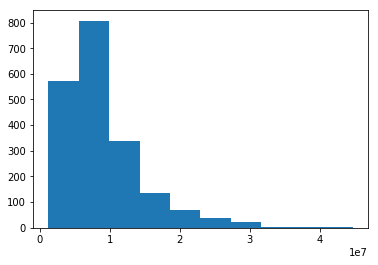

In [50]:
plt.hist(df4['price'],bins=10)
plt.show()

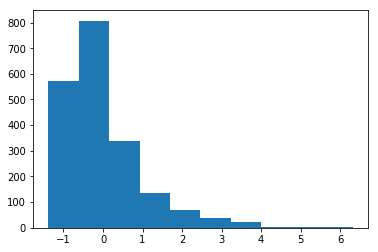

In [51]:
plt.hist(df4['pscaled'],bins=10)
plt.show()

Fitting linear model for the transformed data and analysing the summary

In [52]:
df4['bedrooms'] = df4["bedrooms"].convert_objects(convert_numeric=True)
df4['bathrooms'] = df4["bathrooms"].convert_objects(convert_numeric=True)
df4['parking_space'] = df4["parking_space"].convert_objects(convert_numeric=True)
df4['property_type'] = df4['property_type'].map({'house':1})
df_train = df4.drop(columns=['property_type','year','addr_street', 'lng','lat','property_id','price'])

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import sklearn
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=111)
lm_full = LinearRegression()
model = sm.OLS(y_train,X_train).fit()
#model  =lm_full.fit()
y_pred = model.predict(X_test)
#print ('r-squared for this model = ',lm_full.score(X_test,y_test))
model.summary()

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykern

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pscaled   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.290
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           4.36e-06
Time:                        22:24:08   Log-Likelihood:                -2120.2
No. Observations:                1497   AIC:                             4246.
Df Residuals:                    1494   BIC:                             4262.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms         0.2364      0.053      4.497      0.000       0.133       0.340
bedrooms         -0.0679      0.030     -2.268      0.023      -0.127      -0.009
parking_space    -0.0550      0.036     -1.538      0.124      -0.125       0.015
==============================================================================
Omnibus:                      547.585   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.882
Skew:                           1.787   Prob(JB):                         0.00
Kurtosis:                       7.380   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results shows that R-squared value is 0.018 which is not a good value, if we look at the histogram plot it is right skewed, hence this transformation will not hold good for a linear model.

#### 2.Min Max normalisation

In [53]:
df4 = df5.copy()
df4["price"] = df4["price"].convert_objects(convert_numeric=True)
minmax_scale = preprocessing.MinMaxScaler().fit(df4[['price']])
df_minmax = minmax_scale.transform(df4[['price']])
df_minmax[0:5]

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


array([[0.05883705],
       [0.156171  ],
       [0.08113077],
       [0.0620547 ],
       [0.06067571]])

In [54]:
minA = df4['price'].min()
maxA = df4['price'].max()
minA, maxA

(1200000.0, 44710000.0)

In [55]:
a = df4.price[0] # the first value, for practice
#Write you code here
mma = (a - minA) / (maxA - minA)
mma

0.058837048954263386

In [56]:
df_minmax[0][0]

0.058837048954263386

Comparing the manually computed and the value given by MinMaxScaler, both the values are same

Normalising the maximum value, which should be equal to 1

In [57]:
a = df4[df4.price == df4.price.max()].price
mma = (a - minA) / (maxA - minA)
mma

1706    1.0
Name: price, dtype: float64

The minimum and the maximum value after normalising will be 0 and 1 respectively

In [58]:
print('Min-value after min-max scaling:\nPrice = {:.2f}'
      .format(df_minmax[:,0].min()))
print('\nMax-value after min-max scaling:\nPrice = {:.2f}'
      .format(df_minmax[:,0].max()))

Min-value after min-max scaling:
Price = 0.00

Max-value after min-max scaling:
Price = 1.00


In [59]:
df4['sscaled']=df_minmax[:,0]

Plotting the computed and the actual value using histogram

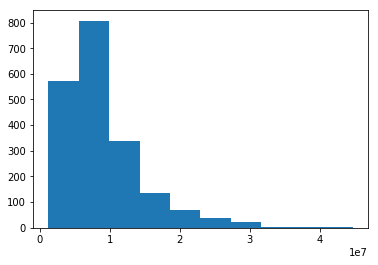

In [60]:
plt.hist(df4['price'],bins=10)
plt.show()

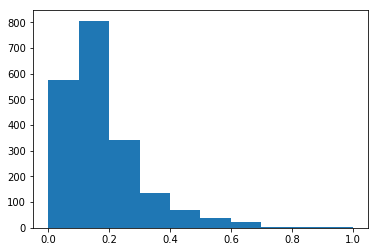

In [61]:
plt.hist(df4['sscaled'],bins=10)
plt.show()

Fitting linear model for the transformed data and analysing the summary

In [62]:
df4['bedrooms'] = df4["bedrooms"].convert_objects(convert_numeric=True)
df4['bathrooms'] = df4["bathrooms"].convert_objects(convert_numeric=True)
df4['parking_space'] = df4["parking_space"].convert_objects(convert_numeric=True)
df4['property_type'] = df4['property_type'].map({'house':1})
df_train = df4.drop(columns=['property_type','year','addr_street', 'lng','lat','property_id','price'])

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import sklearn
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=111)
lm_full = LinearRegression()
model = sm.OLS(y_train,X_train).fit()
#model  =lm_full.fit()
y_pred = model.predict(X_test)
#print ('r-squared for this model = ',lm_full.score(X_test,y_test))
model.summary()

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykern

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sscaled   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1067.
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:24:09   Log-Likelihood:                 979.95
No. Observations:                1497   AIC:                            -1954.
Df Residuals:                    1494   BIC:                            -1938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms         0.0299      0.007      4.511      0.000       0.017       0.043
bedrooms          0.0413      0.004     10.941      0.000       0.034       0.049
parking_space     0.0005      0.005      0.108      0.914      -0.008       0.009
==============================================================================
Omnibus:                      447.285   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1296.051
Skew:                           1.527   Prob(JB):                    3.68e-282
Kurtosis:                       6.384   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the R squared value which has improved compared to the z transformation, but the skew is still postive and it is right skewed

#### 3.Root transformation

We use square root method to transform the data to standardise and check if the transformation fits better for linear model.

In [63]:
import math
df4 = df5.copy()
df4['price'] = df4["price"].convert_objects(convert_numeric=True)
df4['lmr'] = None
i = 0
for row in df4.iterrows():
    df4['lmr'].at[i] = math.sqrt(df4["price"][i])
    i += 1

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
df4['lmr'] = df4["lmr"].convert_objects(convert_numeric=True)

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Plotting Histogram for the square rooted values

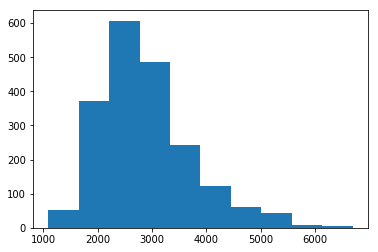

In [65]:
plt.hist(df4["lmr"])
plt.show()

This model looks better, by observing that the skewness has reduced

Fitting linear model for the transformed data and analysing the summary

In [66]:
df4['bedrooms'] = df4["bedrooms"].convert_objects(convert_numeric=True)
df4['bathrooms'] = df4["bathrooms"].convert_objects(convert_numeric=True)
df4['parking_space'] = df4["parking_space"].convert_objects(convert_numeric=True)
df4['property_type'] = df4['property_type'].map({'house':1})
df_train = df4.drop(columns=['property_type','year','addr_street', 'lng','lat','property_id','price'])

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import sklearn
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=111)
lm_full = LinearRegression()
model = sm.OLS(y_train,X_train).fit()
#model  =lm_full.fit()
y_pred = model.predict(X_test)
#print ('r-squared for this model = ',lm_full.score(X_test,y_test))
model.summary()

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykern

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lmr   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4659.
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:24:10   Log-Likelihood:                -12365.
No. Observations:                1497   AIC:                         2.474e+04
Df Residuals:                    1494   BIC:                         2.475e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms       165.2213     49.296      3.352      0.001      68.524     261.919
bedrooms        754.7574     28.068     26.891      0.000     699.701     809.814
parking_space    79.0055     33.537      2.356      0.019      13.222     144.789
==============================================================================
Omnibus:                       24.541   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.455
Skew:                           0.319   Prob(JB):                     2.97e-06
Kurtosis:                       3.014   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R square value has increased, skewness is also less, we can use this transformation for our model, but we will consider other two transformation techniques to see the accuracy.

#### 4.Square power transformation

In [67]:
import math
df4 = df5.copy()
df4['price'] = df4["price"].convert_objects(convert_numeric=True)
df4['lmr'] = None
i = 0
for row in df4.iterrows():
    df4['lmr'].at[i] = math.pow(df4["price"][i],2)
    i += 1

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
df4['lmr'] = df4["lmr"].convert_objects(convert_numeric=True)

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Plotting the histogram for the square powered values

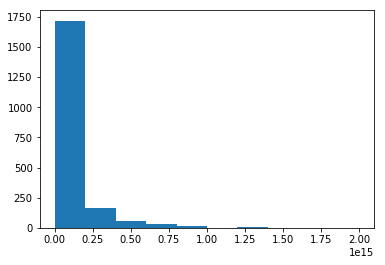

In [69]:
plt.hist(df4['lmr'])
plt.show()

The graph shows that the data is right skewed and compared to the original data the skewness has indeed increased

Fitting linear model for the transformed data and analysing the summary

In [70]:
df4['bedrooms'] = df4["bedrooms"].convert_objects(convert_numeric=True)
df4['bathrooms'] = df4["bathrooms"].convert_objects(convert_numeric=True)
df4['parking_space'] = df4["parking_space"].convert_objects(convert_numeric=True)
df4['property_type'] = df4['property_type'].map({'house':1})
df_train = df4.drop(columns=['property_type','year','addr_street', 'lng','lat','property_id','price'])

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import sklearn
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=111)
lm_full = LinearRegression()
model = sm.OLS(y_train,X_train).fit()
#model  =lm_full.fit()
y_pred = model.predict(X_test)
#print ('r-squared for this model = ',lm_full.score(X_test,y_test))
model.summary()

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykern

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lmr   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     269.6
Date:                Fri, 26 Oct 2018   Prob (F-statistic):          7.94e-140
Time:                        22:24:11   Log-Likelihood:                -51149.
No. Observations:                1497   AIC:                         1.023e+05
Df Residuals:                    1494   BIC:                         1.023e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      4.334e+13    8.8e+12      4.925      0.000    2.61e+13    6.06e+13
bedrooms       1.836e+13   5.01e+12      3.663      0.000    8.53e+12    2.82e+13
parking_space -5.029e+12   5.99e+12     -0.840      0.401   -1.68e+13    6.71e+12
==============================================================================
Omnibus:                     1311.482   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42675.851
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      27.885   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe that the R square value has decreased and the skew value also has increased and hence this is not good for our linear model

#### 5.Log transformation

In [71]:
import math
df4 = df5.copy()
df4['price'] = df4["price"].convert_objects(convert_numeric=True)
df4['lmr'] = None
i = 0
for row in df4.iterrows():
    df4['lmr'].at[i] = math.log(df4["price"][i])
    i += 1

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
df4['lmr'] = df4["lmr"].convert_objects(convert_numeric=True)

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Plotting the log transformed values using histogram

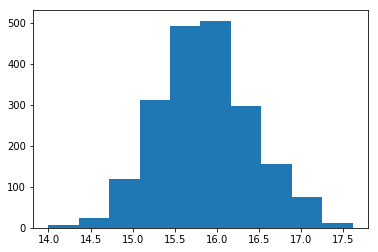

In [73]:
plt.hist(df4['lmr'])
plt.show()

Fitting linear model for the transformed data and analysing the summary

In [74]:
df4['bedrooms'] = df4["bedrooms"].convert_objects(convert_numeric=True)
df4['bathrooms'] = df4["bathrooms"].convert_objects(convert_numeric=True)
df4['parking_space'] = df4["parking_space"].convert_objects(convert_numeric=True)
df4['property_type'] = df4['property_type'].map({'house':1})
df_train = df4.drop(columns=['property_type','year','addr_street', 'lng','lat','property_id','price'])

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import sklearn
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=111)
lm_full = LinearRegression()
model = sm.OLS(y_train,X_train).fit()
#model  =lm_full.fit()
y_pred = model.predict(X_test)
#print ('r-squared for this model = ',lm_full.score(X_test,y_test))
model.summary()

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykern

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lmr   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     9336.
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:24:12   Log-Likelihood:                -4029.3
No. Observations:                1497   AIC:                             8065.
Df Residuals:                    1494   BIC:                             8081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms         0.0301      0.188      0.160      0.873      -0.339       0.399
bedrooms          4.3926      0.107     40.991      0.000       4.182       4.603
parking_space     0.6468      0.128      5.051      0.000       0.396       0.898
==============================================================================
Omnibus:                        4.656   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.649
Skew:                          -0.106   Prob(JB):                       0.0978
Kurtosis:                       3.172   Cond. No.                         8.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared value is 0.949 which is the highest for any of the transformations, skew is -0.106 which is the least for any of the transformation techniques.

Hence we conclude that Log transformation is the best method to fit our linear model.